In [837]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt 
import missingno as mo
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [838]:
df=pd.read_csv('MRI.csv')

In [839]:
df.head()

,ID,acc_itn,priority,acct,stp_dtime,ord_for_dtime,dept,proc_no,reason1,cpt_code,pt_adm_no_ext
0,1,7231535,Routine,4004017060,12-04-2017 17:11,12-04-2017 01:56,MRI,1601,lip abscess,70543.0,4004017060
1,2,7231655,Routine,4004017134,13-04-2017 17:20,12-04-2017 08:06,MRI,1602,large sacral decubitus,72197.0,4004017134
2,3,7231760,Routine,6223112189,12-04-2017 22:07,12-04-2017 09:26,MRI,1604,panc abnormality,74183.0,6223112189
3,4,7231762,Routine,6223112302,12-04-2017 16:16,12-04-2017 09:32,MRI,1554,rule out CNS mets,70553.0,6223112302
4,5,7231812,Routine,6223108688,12-04-2017 21:52,12-04-2017 09:59,MRI,447,Syncope/dizziness,70551.0,6223108688


In [840]:
df.columns

Index(['ID', 'acc_itn', 'priority', 'acct', 'stp_dtime', 'ord_for_dtime',
       'dept', 'proc_no', 'reason1', 'cpt_code', 'pt_adm_no_ext'],
      dtype='object')

In [841]:
df.shape

(4755, 11)

In [842]:
df.info

<bound method DataFrame.info of         ID  acc_itn  priority        acct         stp_dtime     ord_for_dtime  \
0        1  7231535  Routine   4004017060  12-04-2017 17:11  12-04-2017 01:56   
1        2  7231655  Routine   4004017134  13-04-2017 17:20  12-04-2017 08:06   
2        3  7231760  Routine   6223112189  12-04-2017 22:07  12-04-2017 09:26   
3        4  7231762  Routine   6223112302  12-04-2017 16:16  12-04-2017 09:32   
4        5  7231812  Routine   6223108688  12-04-2017 21:52  12-04-2017 09:59   
...    ...      ...       ...         ...               ...               ...   
4750  4751  7616942  Stat      6223543003  11-04-2018 21:38  11-04-2018 18:46   
4751  4752  7616987  Stat      6223538506  11-04-2018 22:23  11-04-2018 19:21   
4752  4753  7617160  SCHEDULE  6223524442  12-04-2018 09:44  12-04-2018 06:47   
4753  4754  7617232  As soon   6223547659  12-04-2018 11:33  12-04-2018 07:52   
4754  4755  7617326  As soon   6223547659  12-04-2018 11:33  12-04-2018 09:08

In [843]:
df.describe()

,ID,acc_itn,acct,proc_no,cpt_code,pt_adm_no_ext
count,4755.000000,4.755000e+03,4.755000e+03,4755.000000,4751.00000,4.755000e+03
mean,2378.000000,7.419800e+06,5.598179e+09,1020.975394,71489.08314,5.598179e+09
std,1372.794595,1.100040e+05,9.908031e+08,575.678701,1381.36143,9.908031e+08
min,1.000000,7.231535e+06,3.100000e+09,446.000000,70540.00000,3.100000e+09
25%,1189.500000,7.325926e+06,4.004063e+09,447.000000,70551.00000,4.004063e+09
50%,2378.000000,7.416011e+06,6.223232e+09,455.000000,70551.00000,6.223232e+09
75%,3566.500000,7.514258e+06,6.223383e+09,1602.000000,72156.00000,6.223383e+09
max,4755.000000,7.617326e+06,6.223548e+09,1675.000000,75561.00000,6.223548e+09


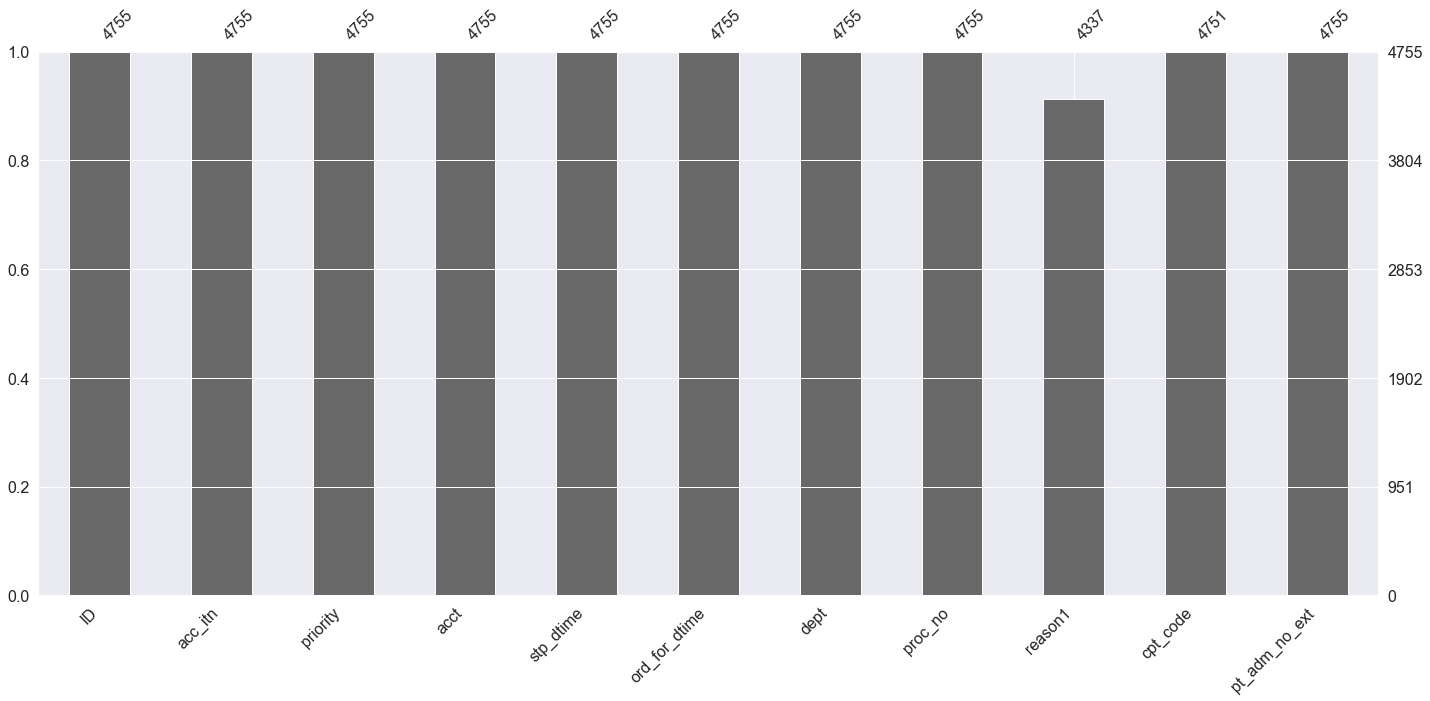

In [844]:
mo.bar(df)

In [845]:
df.isnull().sum()

ID                 0
acc_itn            0
priority           0
acct               0
stp_dtime          0
ord_for_dtime      0
dept               0
proc_no            0
reason1          418
cpt_code           4
pt_adm_no_ext      0
dtype: int64

In [846]:
df.dtypes

ID                 int64
acc_itn            int64
priority          object
acct               int64
stp_dtime         object
ord_for_dtime     object
dept              object
proc_no            int64
reason1           object
cpt_code         float64
pt_adm_no_ext      int64
dtype: object

In [847]:
df.reason1.value_counts()

TIA                                         573
Stroke                                      572
Altered Level of Consciousness              222
Dizziness                                   170
Syncope                                     115
                                           ... 
L elbow pain/edema                            1
CELLULITIS LEFT FOREARM                       1
RVOT PVCs                                     1
posterior column dysfunction                  1
mrcp -new diliation of the right intrahe      1
Name: reason1, Length: 1423, dtype: int64

In [848]:
df.cpt_code.mean()

71489.08314039149

In [849]:
df.cpt_code.mode()

0    70551.0
dtype: float64

In [850]:
def mko(df):
    mis_no = df.isnull().sum()/len(df) *100
    c=df.isnull().sum()
    miss_frame=pd.concat([c,mis_no],axis=1)
    renamecol=miss_frame.rename(columns={0:"Count",1:"Percentage"})
    renamecol=renamecol[renamecol["Count"]!=0]
    print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(renamecol.shape[0]) +
              " columns that have missing values.")
    return renamecol.round(4)

In [851]:
 mko(df)

Your selected dataframe has 11 columns.
There are 2 columns that have missing values.


,Count,Percentage
reason1,418,8.7907
cpt_code,4,0.0841


In [852]:
df.drop(columns=['reason1','ID'],axis=1,inplace=True)

In [853]:
df.columns

Index(['acc_itn', 'priority', 'acct', 'stp_dtime', 'ord_for_dtime', 'dept',
       'proc_no', 'cpt_code', 'pt_adm_no_ext'],
      dtype='object')

In [854]:
#df['cpt_code']=df.fillna(df)
df['cpt_code']=df['cpt_code'].fillna(df['cpt_code'].mode()[0])

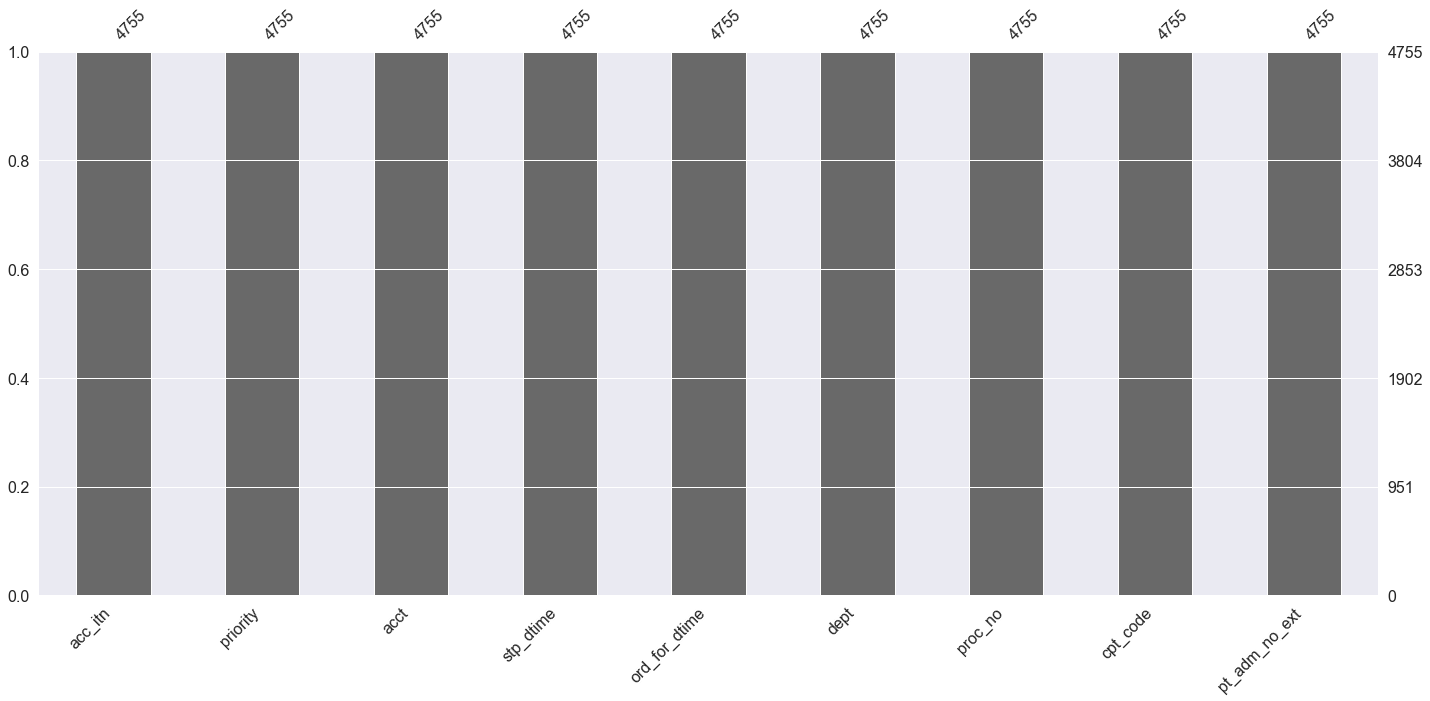

In [855]:
mo.bar(df)

In [856]:
mko(df)

Your selected dataframe has 9 columns.
There are 0 columns that have missing values.


,Count,Percentage


In [857]:
df.head()

,acc_itn,priority,acct,stp_dtime,ord_for_dtime,dept,proc_no,cpt_code,pt_adm_no_ext
0,7231535,Routine,4004017060,12-04-2017 17:11,12-04-2017 01:56,MRI,1601,70543.0,4004017060
1,7231655,Routine,4004017134,13-04-2017 17:20,12-04-2017 08:06,MRI,1602,72197.0,4004017134
2,7231760,Routine,6223112189,12-04-2017 22:07,12-04-2017 09:26,MRI,1604,74183.0,6223112189
3,7231762,Routine,6223112302,12-04-2017 16:16,12-04-2017 09:32,MRI,1554,70553.0,6223112302
4,7231812,Routine,6223108688,12-04-2017 21:52,12-04-2017 09:59,MRI,447,70551.0,6223108688


In [858]:
df.priority.value_counts()

Routine     2803
ROUTINE      548
As soon      392
SCHEDULE     347
STAT         280
Stat         197
PRTY 1       116
ASAP          60
Schedule       6
Neuro          2
PRIOR 1        2
Priority       1
ASAP           1
Name: priority, dtype: int64

In [859]:
import datetime
#(df.ord_for_dtime-df.stp_dtime).astype('timedelta64[h]')
df['ord_for_dtime'] =  pd.to_datetime(df['ord_for_dtime'] )
df['stp_dtime'] =  pd.to_datetime(df['stp_dtime'] )

In [860]:
df.head()

,acc_itn,priority,acct,stp_dtime,ord_for_dtime,dept,proc_no,cpt_code,pt_adm_no_ext
0,7231535,Routine,4004017060,2017-12-04 17:11:00,2017-12-04 01:56:00,MRI,1601,70543.0,4004017060
1,7231655,Routine,4004017134,2017-04-13 17:20:00,2017-12-04 08:06:00,MRI,1602,72197.0,4004017134
2,7231760,Routine,6223112189,2017-12-04 22:07:00,2017-12-04 09:26:00,MRI,1604,74183.0,6223112189
3,7231762,Routine,6223112302,2017-12-04 16:16:00,2017-12-04 09:32:00,MRI,1554,70553.0,6223112302
4,7231812,Routine,6223108688,2017-12-04 21:52:00,2017-12-04 09:59:00,MRI,447,70551.0,6223108688


In [861]:
df.dtypes

acc_itn                   int64
priority                 object
acct                      int64
stp_dtime        datetime64[ns]
ord_for_dtime    datetime64[ns]
dept                     object
proc_no                   int64
cpt_code                float64
pt_adm_no_ext             int64
dtype: object

In [862]:
df['duration']=(df.stp_dtime-df.ord_for_dtime).astype('timedelta64[m]')

In [863]:
df.head()

,acc_itn,priority,acct,stp_dtime,ord_for_dtime,dept,proc_no,cpt_code,pt_adm_no_ext,duration
0,7231535,Routine,4004017060,2017-12-04 17:11:00,2017-12-04 01:56:00,MRI,1601,70543.0,4004017060,915.0
1,7231655,Routine,4004017134,2017-04-13 17:20:00,2017-12-04 08:06:00,MRI,1602,72197.0,4004017134,-337846.0
2,7231760,Routine,6223112189,2017-12-04 22:07:00,2017-12-04 09:26:00,MRI,1604,74183.0,6223112189,761.0
3,7231762,Routine,6223112302,2017-12-04 16:16:00,2017-12-04 09:32:00,MRI,1554,70553.0,6223112302,404.0
4,7231812,Routine,6223108688,2017-12-04 21:52:00,2017-12-04 09:59:00,MRI,447,70551.0,6223108688,713.0


In [864]:
df['duration']=abs(df['duration'])

In [865]:
import dtale

In [866]:
d=dtale.show(df)

http://LAPTOP-L8V33E5K:40000/dtale/main/1
It looks like this data may have already been loaded to D-Tale based on shape and column names. Here is URL of the data that seems to match it:

None

If you still want to load this data please use the following command:

dtale.show(df, ignore_duplicate=True)


In [867]:
d

In [868]:
import pandas as pd

if isinstance(df, (pd.DatetimeIndex, pd.MultiIndex)):
	df = df.to_frame(index=False)

# remove any pre-existing indices for ease of use in the D-Tale code, but this is not required
df = df.reset_index().drop('index', axis=1, errors='ignore')
df.columns = [str(c) for c in df.columns]  # update columns to strings in case they are numbers

chart_data = pd.concat([
	df['priority'],
	df['duration'],
], axis=1)
chart_data = chart_data.sort_values(['priority'])
chart_data = chart_data.rename(columns={'priority': 'x'})
chart_data = chart_data.groupby(['x'])[['duration']].mean().reset_index()
chart_data = chart_data.dropna()

import plotly.graph_objs as go

charts = []
charts.append(go.Bar(
x=chart_data['x'],
y=chart_data['duration']
))
figure = go.Figure(data=charts, layout=go.Layout({
    'barmode': 'group',
    'legend': {'orientation': 'h'},
    'title': {'text': 'duration by priority (Mean) in Minutes'},
    'xaxis': {'title': {'text': 'priority'}},
    'yaxis': {'title': {'text': 'duration (Minutes)'}}
}))

In [869]:
figure

In [870]:
df.to_csv('newmri.csv')

In [871]:
df.head()

,acc_itn,priority,acct,stp_dtime,ord_for_dtime,dept,proc_no,cpt_code,pt_adm_no_ext,duration
0,7231535,Routine,4004017060,2017-12-04 17:11:00,2017-12-04 01:56:00,MRI,1601,70543.0,4004017060,915.0
1,7231655,Routine,4004017134,2017-04-13 17:20:00,2017-12-04 08:06:00,MRI,1602,72197.0,4004017134,337846.0
2,7231760,Routine,6223112189,2017-12-04 22:07:00,2017-12-04 09:26:00,MRI,1604,74183.0,6223112189,761.0
3,7231762,Routine,6223112302,2017-12-04 16:16:00,2017-12-04 09:32:00,MRI,1554,70553.0,6223112302,404.0
4,7231812,Routine,6223108688,2017-12-04 21:52:00,2017-12-04 09:59:00,MRI,447,70551.0,6223108688,713.0


In [872]:
dummies.corr()

,acc_itn,acct,proc_no,cpt_code,pt_adm_no_ext,duration,priority_ASAP,priority_As soon,priority_Neuro,priority_PRIOR 1,priority_PRTY 1,priority_Priority,priority_ROUTINE,priority_Routine,priority_SCHEDULE,priority_STAT,priority_Schedule,priority_Stat
acc_itn,1.000000,-0.008820,0.004496,0.025639,-0.008820,0.014639,-0.014818,0.002794,0.022773,0.001910,0.001111,-0.004095,0.017927,0.016274,-0.029054,-0.028542,-0.010688,0.006562
acct,-0.008820,1.000000,-0.047589,-0.062460,1.000000,-0.019062,-0.008861,-0.037466,0.012947,0.012944,0.041762,-0.023338,-0.027170,-0.046232,0.177032,-0.025235,0.007917,-0.019923
proc_no,0.004496,-0.047589,1.000000,0.212573,-0.047589,0.018618,0.052317,-0.013504,-0.000730,0.000963,-0.018726,0.015824,0.206522,-0.172714,0.087046,0.001226,-0.024133,-0.011635
cpt_code,0.025639,-0.062460,0.212573,1.000000,-0.062460,0.015657,0.028293,0.098050,-0.013908,-0.013975,-0.102910,-0.009918,0.035886,-0.163657,0.177036,0.022298,-0.010527,0.022551
pt_adm_no_ext,-0.008820,1.000000,-0.047589,-0.062460,1.000000,-0.019062,-0.008861,-0.037466,0.012947,0.012944,0.041762,-0.023338,-0.027170,-0.046232,0.177032,-0.025235,0.007917,-0.019923
duration,0.014639,-0.019062,0.018618,0.015657,-0.019062,1.000000,0.010976,-0.020556,-0.006816,-0.007043,-0.051182,-0.004985,0.002957,0.077323,-0.025578,-0.036913,-0.007452,-0.053311
priority_ASAP,-0.014818,-0.008861,0.052317,0.028293,-0.008861,0.010976,1.000000,-0.033885,-0.002319,-0.002319,-0.017876,-0.001640,-0.040800,-0.135466,-0.031718,-0.028277,-0.004018,-0.023502
priority_As soon,0.002794,-0.037466,-0.013504,0.098050,-0.037466,-0.020556,-0.033885,1.000000,-0.006149,-0.006149,-0.047399,-0.004347,-0.108182,-0.359188,-0.084100,-0.074978,-0.010654,-0.062316
priority_Neuro,0.022773,0.012947,-0.000730,-0.013908,0.012947,-0.006816,-0.002319,-0.006149,1.000000,-0.000421,-0.003244,-0.000298,-0.007403,-0.024581,-0.005755,-0.005131,-0.000729,-0.004265
priority_PRIOR 1,0.001910,0.012944,0.000963,-0.013975,0.012944,-0.007043,-0.002319,-0.006149,-0.000421,1.000000,-0.003244,-0.000298,-0.007403,-0.024581,-0.005755,-0.005131,-0.000729,-0.004265


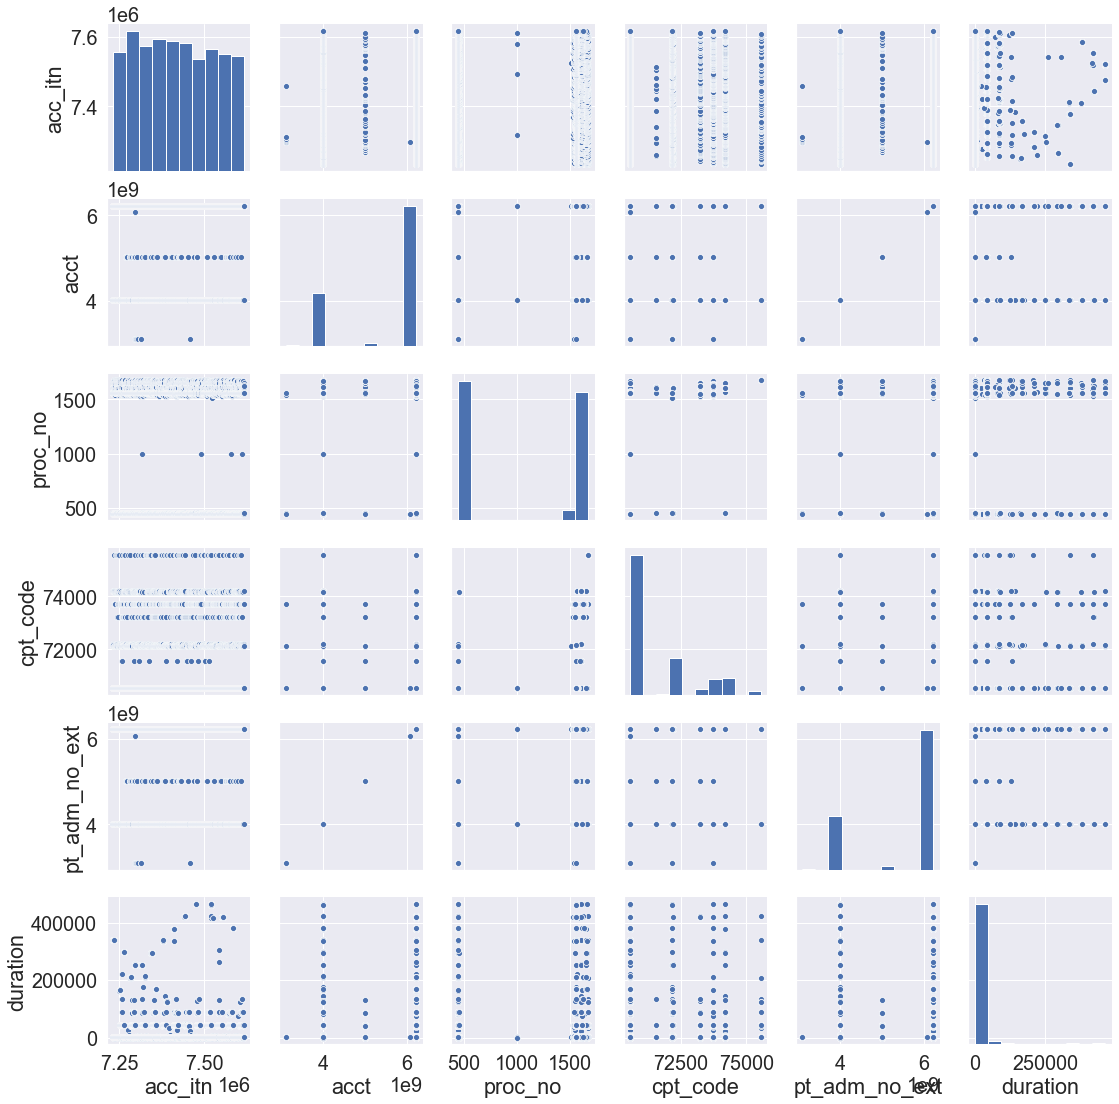

In [873]:
sb.pairplot(df)

In [874]:
df.dtypes

acc_itn                   int64
priority                 object
acct                      int64
stp_dtime        datetime64[ns]
ord_for_dtime    datetime64[ns]
dept                     object
proc_no                   int64
cpt_code                float64
pt_adm_no_ext             int64
duration                float64
dtype: object

In [875]:
dummies.head()

,acc_itn,acct,stp_dtime,ord_for_dtime,proc_no,cpt_code,pt_adm_no_ext,duration,priority_ASAP,priority_As soon,priority_Neuro,priority_PRIOR 1,priority_PRTY 1,priority_Priority,priority_ROUTINE,priority_Routine,priority_SCHEDULE,priority_STAT,priority_Schedule,priority_Stat
0,7231535,4004017060,2017-12-04 17:11:00,2017-12-04 01:56:00,1601,70543.0,4004017060,915.0,0,0,0,0,0,0,0,1,0,0,0,0
1,7231655,4004017134,2017-04-13 17:20:00,2017-12-04 08:06:00,1602,72197.0,4004017134,337846.0,0,0,0,0,0,0,0,1,0,0,0,0
2,7231760,6223112189,2017-12-04 22:07:00,2017-12-04 09:26:00,1604,74183.0,6223112189,761.0,0,0,0,0,0,0,0,1,0,0,0,0
3,7231762,6223112302,2017-12-04 16:16:00,2017-12-04 09:32:00,1554,70553.0,6223112302,404.0,0,0,0,0,0,0,0,1,0,0,0,0
4,7231812,6223108688,2017-12-04 21:52:00,2017-12-04 09:59:00,447,70551.0,6223108688,713.0,0,0,0,0,0,0,0,1,0,0,0,0


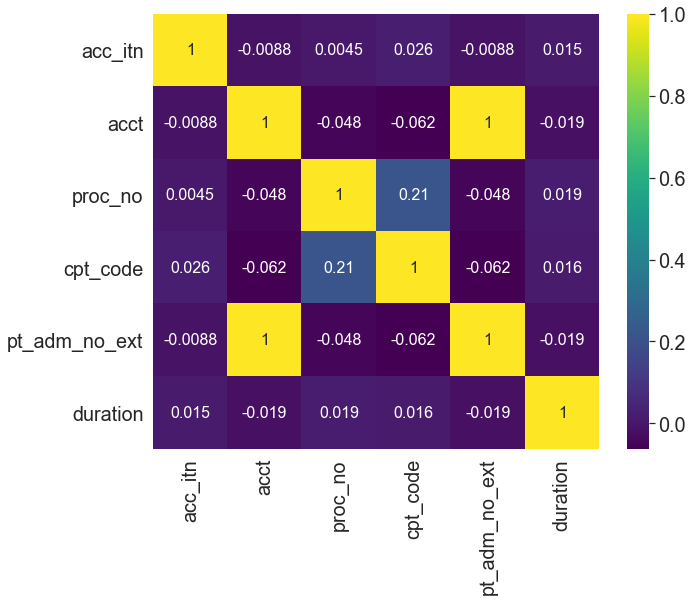

In [876]:
corr_mat = df.corr()
sb.set(font_scale=1.8)
plt.figure(figsize=(10,8))
sb.heatmap(corr_mat, annot=True, cmap='viridis' , annot_kws={"size": 16},)

In [877]:
cat_col=df.select_dtypes(include=[np.object])
cat_col.columns

Index(['priority', 'dept'], dtype='object')

In [878]:
zebra=['priority', 'dept']

In [879]:
dummies=pd.get_dummies(df,columns=zebra,drop_first=True)
dummies.shape

(4755, 20)

In [880]:
dummies.head()

,acc_itn,acct,stp_dtime,ord_for_dtime,proc_no,cpt_code,pt_adm_no_ext,duration,priority_ASAP,priority_As soon,priority_Neuro,priority_PRIOR 1,priority_PRTY 1,priority_Priority,priority_ROUTINE,priority_Routine,priority_SCHEDULE,priority_STAT,priority_Schedule,priority_Stat
0,7231535,4004017060,2017-12-04 17:11:00,2017-12-04 01:56:00,1601,70543.0,4004017060,915.0,0,0,0,0,0,0,0,1,0,0,0,0
1,7231655,4004017134,2017-04-13 17:20:00,2017-12-04 08:06:00,1602,72197.0,4004017134,337846.0,0,0,0,0,0,0,0,1,0,0,0,0
2,7231760,6223112189,2017-12-04 22:07:00,2017-12-04 09:26:00,1604,74183.0,6223112189,761.0,0,0,0,0,0,0,0,1,0,0,0,0
3,7231762,6223112302,2017-12-04 16:16:00,2017-12-04 09:32:00,1554,70553.0,6223112302,404.0,0,0,0,0,0,0,0,1,0,0,0,0
4,7231812,6223108688,2017-12-04 21:52:00,2017-12-04 09:59:00,447,70551.0,6223108688,713.0,0,0,0,0,0,0,0,1,0,0,0,0


In [881]:
df.dtypes

acc_itn                   int64
priority                 object
acct                      int64
stp_dtime        datetime64[ns]
ord_for_dtime    datetime64[ns]
dept                     object
proc_no                   int64
cpt_code                float64
pt_adm_no_ext             int64
duration                float64
dtype: object

In [882]:
dummies.columns

Index(['acc_itn', 'acct', 'stp_dtime', 'ord_for_dtime', 'proc_no', 'cpt_code',
       'pt_adm_no_ext', 'duration', 'priority_ASAP    ', 'priority_As soon ',
       'priority_Neuro   ', 'priority_PRIOR 1 ', 'priority_PRTY 1  ',
       'priority_Priority', 'priority_ROUTINE ', 'priority_Routine ',
       'priority_SCHEDULE', 'priority_STAT    ', 'priority_Schedule',
       'priority_Stat    '],
      dtype='object')

In [883]:
X=dummies.drop(labels=['duration','ord_for_dtime','stp_dtime'],axis=1)
y=dummies[["duration"]]

In [884]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

In [885]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(3804, 17)
(951, 17)
(3804, 1)
(951, 1)


# Random Forest Base Model using The Pycaret Library 

In [886]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(random_state = 0)

model.fit(X_train, y_train)

RandomForestRegressor(random_state=0)

In [887]:
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)  

In [888]:
from sklearn.metrics import accuracy_score
print('Accuracy score for test data using the Random forest model without parameter specification:', model.score(X_test,y_test))

Accuracy score for test data using the Random forest model without parameter specification: 0.49629497699427705


In [889]:
from sklearn.metrics import accuracy_score
from sklearn import metrics
RMSE_train = np.sqrt(metrics.mean_squared_error(y_train, y_pred_train))       
RMSE_test = np.sqrt(metrics.mean_squared_error(y_test, y_pred_test))  
# compute the RMSE of our predictions
print('RMSE for the train set is {}'.format(RMSE_train))
print('RMSE for the test set is {}'.format(RMSE_test))

RMSE for the train set is 16310.60198386366
RMSE for the test set is 42691.75028485914


# Observation 

- The Model Underfits 
- Try Adding More Columns

# Metrics

In [890]:
print("Accuracy Train Data : {}".format(model.score(X_train,y_train)))
print("Accuracy Test  Data : {}".format(model.score(X_test,y_test)))
#print("R squared: {}".format(metrics.r2_score(y_true=X_test,y_pred=y_pred_train)))

Accuracy Train Data : 0.9225585649750472
Accuracy Test  Data : 0.49629497699427705


In [891]:
y_test

,duration
1772,140.0
206,695.0
544,1152.0
1140,44153.0
3759,2146.0
...,...
501,297.0
443,1013.0
1246,1584.0
1132,526.0


In [892]:
y_pred_test

array([2.3321000e+02, 1.2996800e+03, 3.9968000e+02, 1.8259920e+04,
       1.5960800e+03, 1.3459500e+03, 4.5156000e+02, 1.9792500e+03,
       4.0327830e+04, 9.6622380e+04, 6.6909970e+04, 6.8634000e+02,
       6.5456600e+03, 2.0530000e+02, 2.2547540e+04, 2.1651100e+03,
       2.4292700e+03, 1.0328410e+04, 1.3501300e+03, 4.6793690e+04,
       3.2604410e+04, 2.1059718e+05, 3.8754630e+04, 1.0326400e+03,
       6.5253500e+03, 2.3454000e+03, 9.2555000e+02, 1.8924900e+04,
       5.2955030e+04, 4.8159570e+04, 6.4010000e+02, 8.0470000e+02,
       4.3083320e+04, 1.5584060e+04, 2.6739010e+04, 3.3170700e+03,
       5.9656000e+02, 7.9523000e+02, 1.6442400e+03, 1.3979900e+03,
       3.8080000e+02, 1.5208170e+04, 2.3728070e+04, 2.4216970e+04,
       5.5670200e+03, 3.0937780e+04, 5.2389020e+04, 9.8045300e+03,
       4.2934000e+02, 4.1997040e+04, 6.9702000e+02, 2.3250910e+04,
       2.7348060e+04, 1.1205000e+03, 3.4797200e+03, 3.7025600e+03,
       6.6325000e+02, 3.6467800e+03, 1.6250120e+04, 1.9458400e

In [893]:
a=pd.DataFrame(y_pred_test)

In [894]:
y_test.reset_index(inplace=True)

In [895]:
x=y_test.join(a)

In [896]:
x.drop(columns='index',inplace=True)

In [897]:
x.rename({0:'Predicted Duration' },axis=1)

,duration,Predicted Duration
0,140.0,233.21
1,695.0,1299.68
2,1152.0,399.68
3,44153.0,18259.92
4,2146.0,1596.08
...,...,...
946,297.0,254.99
947,1013.0,904.10
948,1584.0,2891.71
949,526.0,26131.59


In [898]:
dummies.cpt_code

0       70543.0
1       72197.0
2       74183.0
3       70553.0
4       70551.0
         ...   
4750    72156.0
4751    70551.0
4752    72148.0
4753    73720.0
4754    73723.0
Name: cpt_code, Length: 4755, dtype: float64

# Classification

In [899]:
df.dtypes

acc_itn                   int64
priority                 object
acct                      int64
stp_dtime        datetime64[ns]
ord_for_dtime    datetime64[ns]
dept                     object
proc_no                   int64
cpt_code                float64
pt_adm_no_ext             int64
duration                float64
dtype: object

In [900]:
dummies['cpt_code'] = dummies['cpt_code'].astype('category')

In [901]:
X_new=dummies.drop(labels=['cpt_code', 'acct', 'ord_for_dtime','stp_dtime'],axis=1)
y_new=dummies[["cpt_code"]]

In [902]:
X_train, X_test, y_train, y_test = train_test_split(X_new,y_new,test_size=0.50,random_state=42)

In [903]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import classification_report

In [904]:
dt= DecisionTreeClassifier()

In [905]:
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [906]:
y_pred_tree_test=dt.predict(X_test)

In [907]:
y_pred_tree_train=dt.predict(X_train)

In [908]:
y_test

,cpt_code
731,70553.0
2602,74183.0
1965,70551.0
4038,73221.0
1497,70549.0
...,...
3994,70553.0
2581,70544.0
3365,70551.0
4740,73720.0


In [909]:
y_pred_tree_test

array([70553., 74183., 70551., ..., 70551., 73720., 70551.])

In [910]:
y=pd.DataFrame(y_pred_tree_test)

In [911]:
y_test.reset_index(inplace=True)

In [912]:
zz=y_test.join(y)

In [913]:
zz

,index,cpt_code,0
0,731,70553.0,70553.0
1,2602,74183.0,74183.0
2,1965,70551.0,70551.0
3,4038,73221.0,73221.0
4,1497,70549.0,70549.0
...,...,...,...
2373,3994,70553.0,70553.0
2374,2581,70544.0,70544.0
2375,3365,70551.0,70551.0
2376,4740,73720.0,73720.0


In [914]:
from sklearn.metrics import accuracy_score
print('Accuracy for the train data using the logistic regression model is',accuracy_score(y_pred_tree_train, y_train))
#print('Accuracy for the test data using the logistic regression model is',accuracy_score(y_pred_tree_test, y_test))

Accuracy for the train data using the logistic regression model is 1.0


In [915]:
dt.score(X_train,y_train)

1.0

In [917]:
dummies.dtypes

acc_itn                       int64
acct                          int64
stp_dtime            datetime64[ns]
ord_for_dtime        datetime64[ns]
proc_no                       int64
cpt_code                   category
pt_adm_no_ext                 int64
duration                    float64
priority_ASAP                 uint8
priority_As soon              uint8
priority_Neuro                uint8
priority_PRIOR 1              uint8
priority_PRTY 1               uint8
priority_Priority             uint8
priority_ROUTINE              uint8
priority_Routine              uint8
priority_SCHEDULE             uint8
priority_STAT                 uint8
priority_Schedule             uint8
priority_Stat                 uint8
dtype: object